# Overview
inspired from https://www.kaggle.com/code/kenjee/titanic-project-example/notebook

0) Imports and os commands

1) Understand the shape of the data (Histograms, box plots, etc.)

2) Data Cleaning

3) Data Exploration

4) Feature Engineering

5) Data Preprocessing for Model

6) Basic Model Building

7) Model Tuning

8) Ensemble Modle Building

9) Results

# Project planning and comments
Understand nature of the data .info() .describe() <br>
Histograms and boxplots <br>
Value counts <br>
Missing data <br>
Correlation between features <br>
Explore interesting themes <br>
    - Wealthy survive? <br>
    - By location <br>
    - Age scatterplot with ticket price <br>
    - Young and wealthy Variable? <br>
    - Total spent? <br>
    - Did the captain die with the ship ? <br>
Feature engineering <br>
preprocess data together or use a transformer? <br>
    - use label for train and test   <br>
Scaling?<br>

Model Baseline <br>
Model comparison with CV <br>

# 0) Imports and os commands

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno #visualize missing data
import os
%matplotlib inline

In [2]:
data_path = r'D:\Dropbox\Talan\Codes\Data_Challenges\Kaggle_Titanic\data/'
train_filename = "train.csv"
test_filename  = "test.csv"
submission_filename = "gender_submission.csv"

training = pd.read_csv(data_path + train_filename)
test = pd.read_csv(data_path + test_filename)
submission = pd.read_csv(data_path + test_filename)

# 1) Understand the shape of the data

In [3]:
training.info()
# a few missing values
# some missing dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

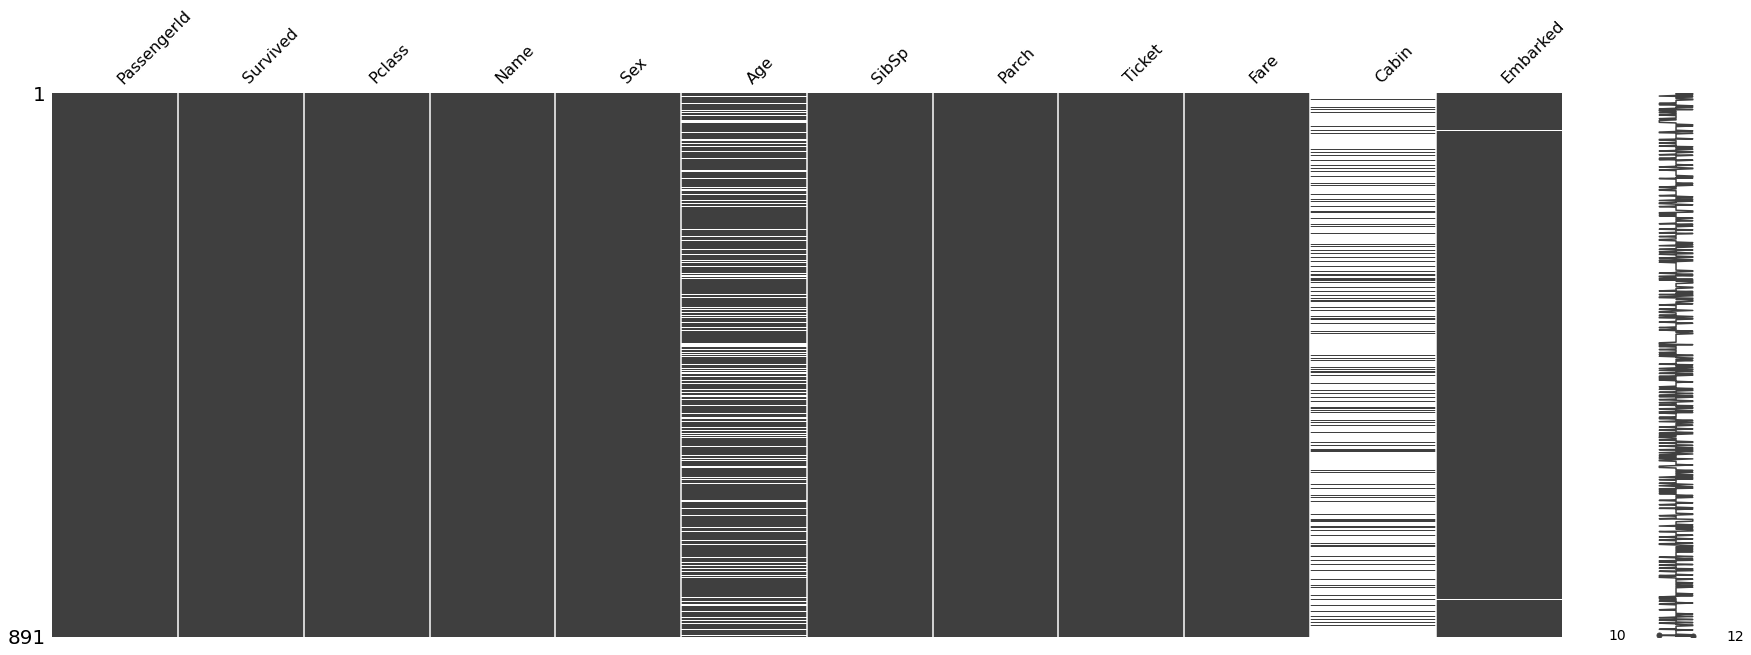

In [8]:
# Plot graphic of missing values
missingno.matrix(training, figsize = (30,10))

## Numeric data exploration

In [9]:
# splitting categorical and numerical variables
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']
categoric_cols = ['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']

df_num = training[numeric_cols]
df_cat = training[categoric_cols]

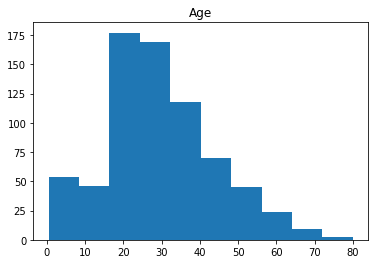

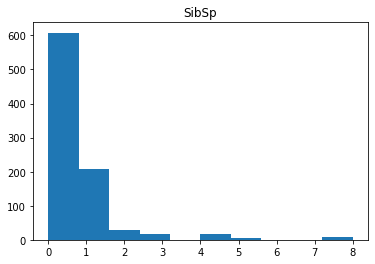

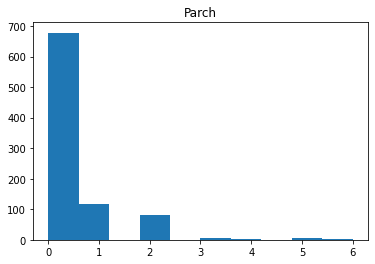

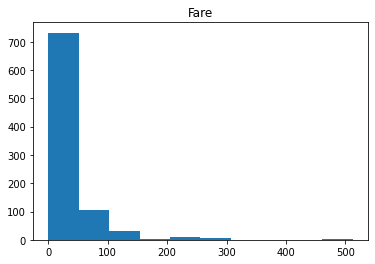

In [10]:
# Distribution of all numeric variables
for col in df_num.columns:
    plt.hist(df_num[col])
    plt.title(col)
    plt.show()
    
# only age seem to follow a normal distribution
# lognormal for other distribution ?

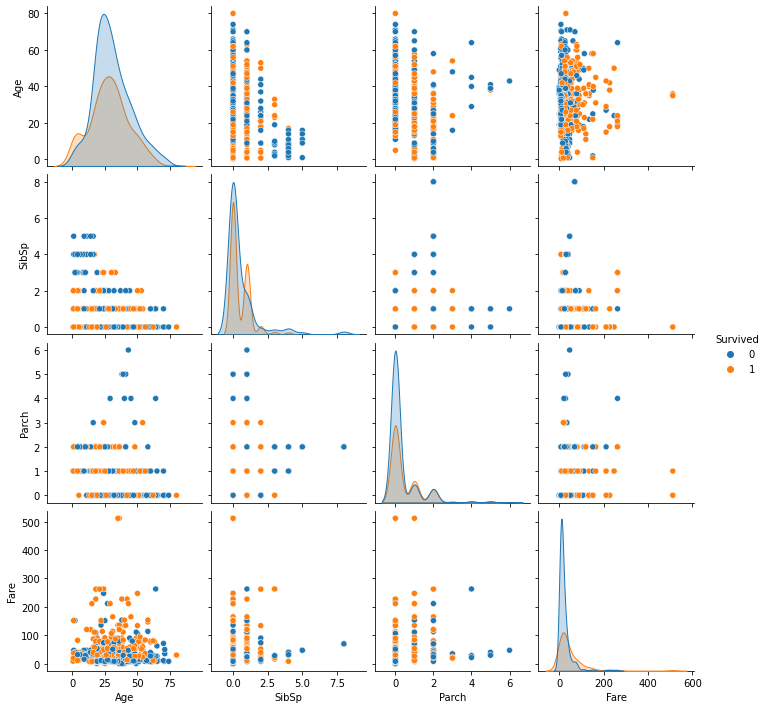

In [11]:
# checking relationship to death
targetCol = ['Survived', 'Age', 'SibSp', 'Parch', 'Fare']
sns.pairplot(data = training[targetCol], hue = "Survived")

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

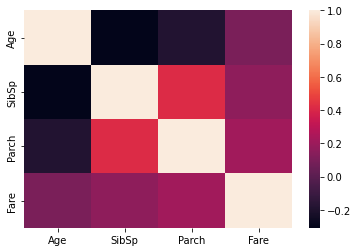

In [12]:
# correlation between numerical features
print(df_num.corr())
sns.heatmap(df_num.corr())

# strong correlation :
# SibSp/Age , Parch/SibSp

In [13]:
# distribution of survival rates accross numerical features
pd.pivot_table(training, index = 'Survived', values = numeric_cols)
# Fare seems strongly correlated to survival rate ? Maybe more expensive tickets were ideally situated to survive on the boat ?

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


## Preliminary conclusion on numerical data
- Data is not normal
- Fare seems to be a strong factor 
- Some weak correlation exist

## Categorical variables

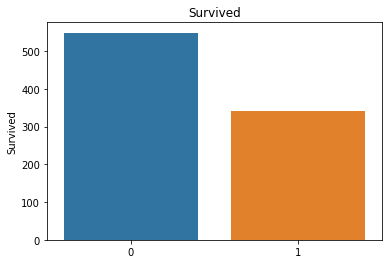

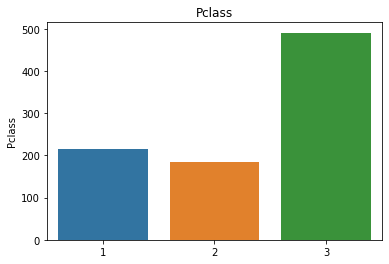

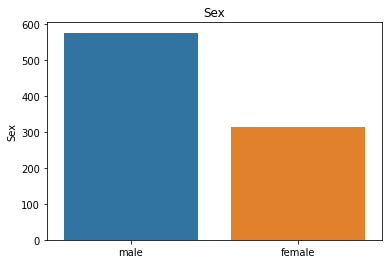

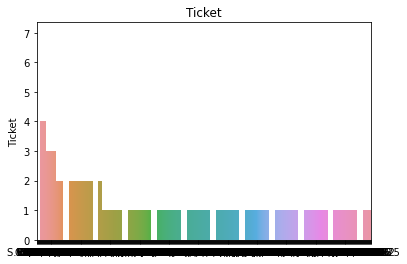

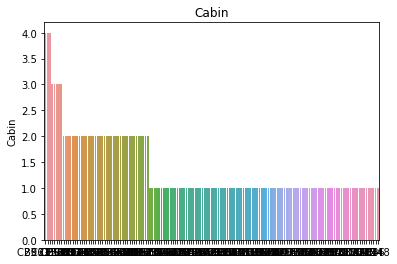

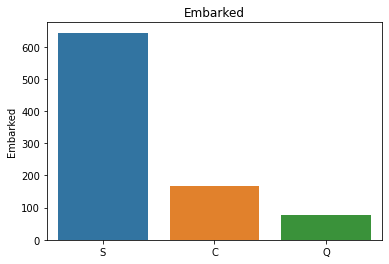

In [14]:
# bar plot 
for i in df_cat.columns:
    sns.barplot(data = df_cat, x = df_cat[i].value_counts().index, y = df_cat[i].value_counts())
    plt.title(i)
    plt.show()
    
# survived target is relatively balanced
# male female is imbalanced
# Pclass distribution makes sense

In [15]:
# the cabin  features are very messy. Exploring values
print(df_cat['Cabin'].value_counts())
print(df_cat['Cabin'].unique())
# lots of unique values which don't make obvious sense.
# Letter might be related to level or boat side ? might be important

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63

In [16]:
# the Ticket  features are very messy. Exploring values
print(df_cat['Ticket'].value_counts())
print(df_cat['Ticket'].unique())
# lots of unique values which don't make obvious sense.
# No obvious behavior

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' '

In [17]:
# Comparing survival and each categorical variable
pd.pivot_table(df_cat, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc = 'count')
# Class is clearly an important feature ! == Higher class, low mortality

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [18]:
pd.pivot_table(df_cat, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count')
# Sex is clearly an important feature ! == Men, higher mortality

Sex,female,male
Survived,,
0,81,468
1,233,109


In [19]:
pd.pivot_table(df_cat, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc = 'count')
# Embarking from S seems to increase mortality. This might be highly correlated to Class

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [20]:
pd.pivot_table(df_cat, index = 'Pclass', columns = 'Embarked', values = 'Ticket', aggfunc = 'count')
# People embarking from C tend to have higher Pclass and thus lower mortality

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


# Now that we have a better understanding of the data, we modify it according to types and ranges

In [21]:
cat_cols = df_cat.columns
num_cols = df_num.columns
print(cat_cols)

Index(['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [22]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   Ticket    891 non-null    object
 4   Cabin     204 non-null    object
 5   Embarked  889 non-null    object
dtypes: int64(2), object(4)
memory usage: 41.9+ KB


In [23]:
#mapping Sex and Embarked to numerical variables
print(df_cat["Sex"].value_counts())
print(df_cat["Embarked"].value_counts())

male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [24]:
# mapping embarked so numerical categories
mapping = {"S" : int(1), "C" : int(0), "Q" : int(2)}
training[["Embarked"]] = training[["Embarked"]].applymap(lambda s:mapping.get(s) if s in mapping else np.NaN)

In [25]:
# mapping sex to numerical categories
mapping = {"male" : 1, "female" : 0}
training[["Sex"]] = training[["Sex"]].applymap(lambda s:mapping.get(s) if s in mapping else np.NaN)

In [26]:
# setting Sex, Embarked, Survived, Pclass as categories
target_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']
for col in target_cols:
    training[col] = training[col].astype('category')

In [27]:
training.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,2.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,0.0


In [28]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 59.8+ KB


In [29]:
# Dealing with cabin
df_cat['Cabin'].value_counts()
# some people have multiple cabins, most are not indicated we add a new feature for this

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [30]:
# making number of cabin as a feature
training['NbCabin'] = df_cat['Cabin'].apply(lambda x: np.NaN if pd.isna(x) else len(x.split(' ')))

In [31]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NbCabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0.0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0,NaN


In [32]:
pd.pivot_table(training, index='Survived', columns = 'NbCabin', values='Ticket', aggfunc = 'count')

NbCabin,1.0,2.0,3.0,4.0
Survived,,,,
0,58,7,3,0
1,122,9,3,2


In [33]:
#create catégories based on the cabin letter
df_cat['Cabin'].apply(lambda x: str(x)[0]).value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [34]:
mapping = {'C':    1,
            'B' :    2,
            'D'  :   3,
            'E'   :  4,
           'A'    : 5,
            'F'   :  6,
            'G'   :  7,
            'T'   :   8}
training['Cabin'] = df_cat['Cabin'].apply(lambda x: str(x)[0])\
.apply(lambda x: mapping.get(x) if x in mapping else np.NaN)\
.astype('category')

In [35]:
training.head(12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NbCabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0,0.0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1.0,1.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0,NaN
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,2.0,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,4.0,1.0,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,1.0,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,1.0,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,0.0,NaN


In [36]:
# feature ingenerring on person's title
training['Nametitle'] = training['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip()).astype('category')

In [37]:
training['Nametitle'].value_counts().index

CategoricalIndex(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Major', 'Col',
                  'Mlle', 'Sir', 'Ms', 'Capt', 'Mme', 'Lady', 'Jonkheer',
                  'Don', 'the Countess'],
                 categories=['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', ...], ordered=False, dtype='category')

In [38]:
#map titles
titles = training['Nametitle'].value_counts().index
mapping = {}
for idx, title in enumerate(titles):
    mapping[title] = idx
    
training['Nametitle'] = training['Nametitle'].apply(lambda x: mapping.get(x) if x in mapping else np.NaN)

In [39]:
training.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NbCabin,Nametitle
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0,0.0,1.0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1.0,1.0,1.0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",1,NaN,0,0,374910,8.0500,NaN,1.0,NaN,0
96,97,0,1,"Goldschmidt, Mr. George B",1,71.0,0,0,PC 17754,34.6542,5.0,0.0,1.0,0
97,98,1,1,"Greenfield, Mr. William Bertram",1,23.0,0,1,PC 17759,63.3583,3.0,0.0,2.0,0
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",0,34.0,0,1,231919,23.0000,NaN,1.0,NaN,2


In [40]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
 12  NbCabin      204 non-null    float64 
 13  Nametitle    891 non-null    category
dtypes: category(6), float64(3), int64(3), object(2)
memory usage: 62.6+ KB


<Axes: >

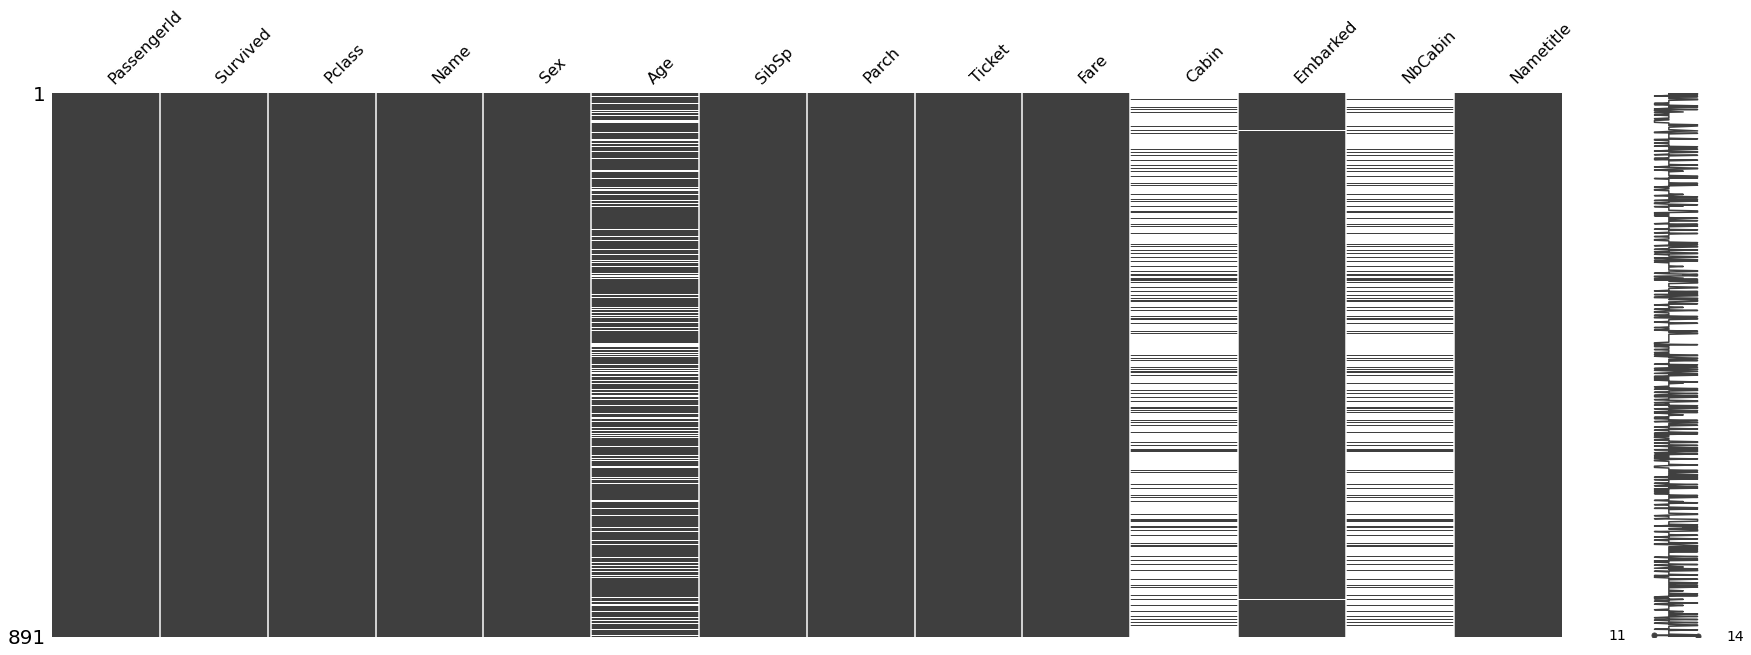

In [41]:
# Plot graphic of missing values
missingno.matrix(training, figsize = (30,10))

# We now have ingeneered featured and a clean dataset. Let's preprocess for models
- Drop null values 
- Include only relevant variables (Since we have limited data, I wanted to exclude things like name and passanger ID so that we could have a reasonable number of features for our models to deal with)
- Impute data with mean or median
- Normalized numerics using logarithm to give more semblance of a normal distribution
- Scaled data 0-1 with standard scaler

In [42]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
 12  NbCabin      204 non-null    float64 
 13  Nametitle    891 non-null    category
dtypes: category(6), float64(3), int64(3), object(2)
memory usage: 62.6+ KB


In [43]:
# processing pipeline

def preproc(data, is_test = False):
    """
    Preprocessing pipeline
    Maps and create new features
    /!\ This is all done according to the content of the training set, beware of resulting NaN /!\
    """
    training = data.copy()
    
    # splitting categorical and numerical variables
    numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']
    if is_test == False:
        categoric_cols = ['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']
    else:
        categoric_cols = ['Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']
        
    df_num = training[numeric_cols]
    df_cat = training[categoric_cols]

    # mapping embarked so numerical categories
    mapping = {"S" : int(1), "C" : int(0), "Q" : int(2)}
    training[["Embarked"]] = training[["Embarked"]].applymap(lambda s:mapping.get(s) if s in mapping else np.NaN)

    # mapping sex to numerical categories
    mapping = {"male" : 1, "female" : 0}
    training[["Sex"]] = training[["Sex"]].applymap(lambda s:mapping.get(s) if s in mapping else np.NaN)

    # setting Sex, Embarked, Survived, Pclass as categories
    if is_test == False:
        target_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']
    else:
        target_cols = ['Pclass', 'Sex', 'Embarked']
        
    for col in target_cols:
        training[col] = training[col].astype('category')

    # making number of cabin as a feature
    training['NbCabin'] = df_cat['Cabin'].apply(lambda x: np.NaN if pd.isna(x) else len(x.split(' ')))

    mapping = {'C':    1,
                'B' :    2,
                'D'  :   3,
                'E'   :  4,
               'A'    : 5,
                'F'   :  6,
                'G'   :  7,
                'T'   :   8}
    training['Cabin'] = df_cat['Cabin'].apply(lambda x: str(x)[0])\
    .apply(lambda x: mapping.get(x) if x in mapping else np.NaN)\
    .astype('category')

    # feature ingenerring on person's title
    training['Nametitle'] = training['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip()).astype('category')

    #map titles
    titles = training['Nametitle'].value_counts().index
    mapping = {}
    for idx, title in enumerate(titles):
        mapping[title] = idx

    training['Nametitle'] = training['Nametitle'].apply(lambda x: mapping.get(x) if x in mapping else np.NaN)

    return training

def fill_missing_values(data):
    """
    fill nan with median
    """
    data['Age'] = data['Age'].fillna(data['Age'].median())
    data['Fare'] = data['Fare'].fillna(data['Fare'].median())
    

    return data

def rescale_distribution(data):
    """
    Rescale to log+1 to produce gaussianè-like distribution
    """
    data['norm_SibSp'] = np.log(data['SibSp'] + 1)
    data['norm_Fare']  = np.log(data['Fare'] + 1)
    
    
    return data


def drop_cols(data):
    """
    Drop unwanted features
    """
    target_cols = ['Name', 'Cabin','NbCabin', 'Fare', 'SibSp', 'Ticket', 'PassengerId']
    data = data.drop(columns = target_cols)
   
    return data
    
def drop_nas(data):  
    """
    Drop nan, only 2 nan in embarked train set.
    0 in test set, therefore doing this is okay.
    """
    data.dropna(subset=['Embarked'], inplace = True)
    return data

def create_dummies(data):
    """
    Create dummy variables for all categorical variable
    Also drops Survived (put in y_train before running this function)
    """
    try:
        dummy = data.copy().drop(columns = ['Survived'])
    except:
        dummy = data.copy()
        
    dummy = pd.get_dummies(dummy)
    
    
    return dummy
    
    
def scaler(data):
    """
    fit transform scaler
    """
    from sklearn.preprocessing import StandardScaler
    scale = StandardScaler()
    all_dummies_scaled = data.copy()
    all_dummies_scaled[['Age','Parch','norm_SibSp','norm_Fare']]= scale.fit_transform(all_dummies_scaled[['Age','Parch','norm_SibSp','norm_Fare']])

    return all_dummies_scaled    
    

In [44]:
try:
    del training
    del test
    del submission
    del test2
except:
    print('nothing to del')

training = pd.read_csv(data_path + train_filename)
test = pd.read_csv(data_path + test_filename)
submission = pd.read_csv(data_path + test_filename)

nothing to del


In [45]:
# merging Test and train data
# this is to ensure the preprocessing pipeline creates the same dummies, categories etc, if the test set contains other categories than expected.
# this is terrible practice but is quite okay when having access to the test set in advance
# this also doesnt change the actual prediction, it just makes the pipeline robust by default
training['train_set'] = 1
test['train_set'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training, test])

In [46]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_set
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [47]:
all_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_set
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,0


In [48]:
# custom preprocessor and feature ing
all_data_2 = preproc(all_data)
# fill missing age and fare with median()
all_data_2 = fill_missing_values(all_data_2)
# rescale fare and age (log+1)
all_data_2 = rescale_distribution(all_data_2)
# drop unwanted features
all_data_2 = drop_cols(all_data_2)
# drop nan (2 rows on embarked, training set only - no nan in test set)
all_data_2 = drop_nas(all_data_2)
# create dummy for categorical variable, also drop target survived
all_dummy = create_dummies(all_data_2)
# standard scaler
all_dummy = scaler(all_dummy)

# make sets
X_train = all_dummy[all_dummy['train_set'] == 1].drop(columns = ['train_set'])
X_test = all_dummy[all_dummy['train_set'] == 0].drop(columns = ['train_set'])

y_train = all_data_2[all_data_2['train_set'] == 1]['Survived']

In [49]:
X_train.head()

,Age,Parch,norm_SibSp,norm_Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0.0,Embarked_1.0,Embarked_2.0,Nametitle_11,Nametitle_6,Nametitle_16,Nametitle_15,Nametitle_5,Nametitle_14,Nametitle_13,Nametitle_8,Nametitle_3,Nametitle_1,Nametitle_9,Nametitle_12,Nametitle_0,Nametitle_2,Nametitle_7,Nametitle_4,Nametitle_10,Nametitle_17
0,-0.580261,-0.445407,0.930628,-0.896331,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.662297,-0.445407,0.930628,1.347870,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,-0.269621,-0.445407,-0.616256,-0.815013,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.429318,-0.445407,0.930628,1.048255,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.429318,-0.445407,-0.616256,-0.800632,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           889 non-null    float64
 1   Parch         889 non-null    float64
 2   norm_SibSp    889 non-null    float64
 3   norm_Fare     889 non-null    float64
 4   Pclass_1      889 non-null    uint8  
 5   Pclass_2      889 non-null    uint8  
 6   Pclass_3      889 non-null    uint8  
 7   Sex_0         889 non-null    uint8  
 8   Sex_1         889 non-null    uint8  
 9   Embarked_0.0  889 non-null    uint8  
 10  Embarked_1.0  889 non-null    uint8  
 11  Embarked_2.0  889 non-null    uint8  
 12  Nametitle_11  889 non-null    uint8  
 13  Nametitle_6   889 non-null    uint8  
 14  Nametitle_16  889 non-null    uint8  
 15  Nametitle_15  889 non-null    uint8  
 16  Nametitle_5   889 non-null    uint8  
 17  Nametitle_14  889 non-null    uint8  
 18  Nametitle_13  889 non-null    

<Axes: >

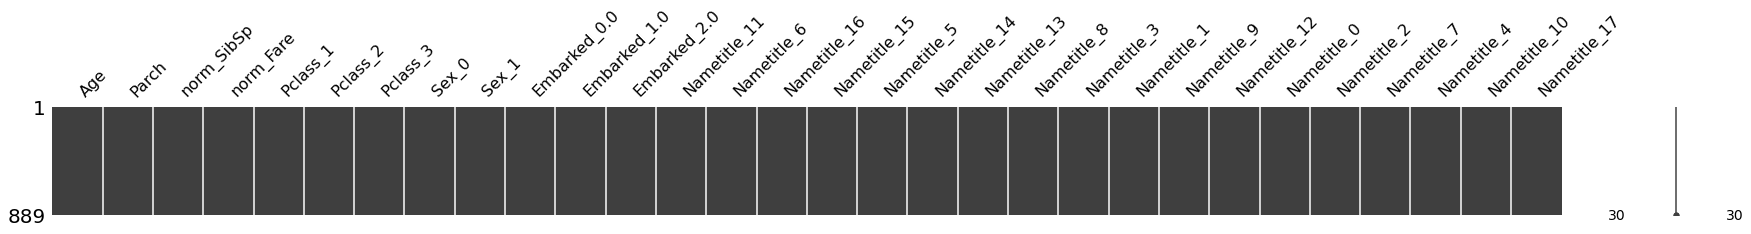

In [51]:
missingno.matrix(X_train, figsize = (30,2))

In [52]:
X_test.head()

,Age,Parch,norm_SibSp,norm_Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0.0,Embarked_1.0,Embarked_2.0,Nametitle_11,Nametitle_6,Nametitle_16,Nametitle_15,Nametitle_5,Nametitle_14,Nametitle_13,Nametitle_8,Nametitle_3,Nametitle_1,Nametitle_9,Nametitle_12,Nametitle_0,Nametitle_2,Nametitle_7,Nametitle_4,Nametitle_10,Nametitle_17
0,0.390488,-0.445407,-0.616256,-0.826172,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1.361236,-0.445407,0.930628,-0.928150,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2.526134,-0.445407,-0.616256,-0.628665,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,-0.191961,-0.445407,-0.616256,-0.732917,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-0.580261,0.709647,0.930628,-0.403510,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


<Axes: >

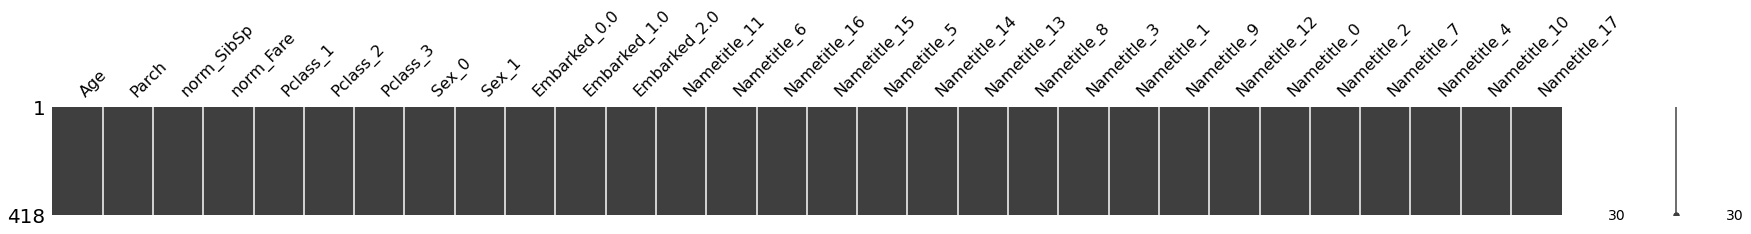

In [53]:
missingno.matrix(X_test, figsize = (30,2))

In [54]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           418 non-null    float64
 1   Parch         418 non-null    float64
 2   norm_SibSp    418 non-null    float64
 3   norm_Fare     418 non-null    float64
 4   Pclass_1      418 non-null    uint8  
 5   Pclass_2      418 non-null    uint8  
 6   Pclass_3      418 non-null    uint8  
 7   Sex_0         418 non-null    uint8  
 8   Sex_1         418 non-null    uint8  
 9   Embarked_0.0  418 non-null    uint8  
 10  Embarked_1.0  418 non-null    uint8  
 11  Embarked_2.0  418 non-null    uint8  
 12  Nametitle_11  418 non-null    uint8  
 13  Nametitle_6   418 non-null    uint8  
 14  Nametitle_16  418 non-null    uint8  
 15  Nametitle_15  418 non-null    uint8  
 16  Nametitle_5   418 non-null    uint8  
 17  Nametitle_14  418 non-null    uint8  
 18  Nametitle_13  418 non-null    

# Model Building

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Standard modelling, cross validation, no tuning

In [56]:
#I usually use Naive Bayes as a baseline for my classification tasks 
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.61797753 0.63483146 0.78089888 0.7752809  0.62146893]
0.6860915381197232


In [57]:
lr = LogisticRegression(max_iter = 1000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.81460674 0.78651685 0.80337079 0.85310734]
0.8166888846568907


In [58]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.78651685 0.82022472 0.73033708 0.79661017]
0.7806703485050467


In [59]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.78089888 0.84269663 0.79213483 0.84745763]
0.8144353456484478


In [60]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79775281 0.80337079 0.84831461 0.75280899 0.82485876]
0.8054211896146766


In [61]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84831461 0.81460674 0.82022472 0.80898876 0.8700565 ]
0.8324382657271631


In [62]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81460674 0.80898876 0.84269663 0.7752809  0.81355932]
0.8110264711483527


In [63]:
#Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 
cv = cross_val_score(voting_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84831461 0.83146067 0.8258427  0.79775281 0.8700565 ]
0.8346854567383991


In [64]:
# voting classifier predictions
voting_clf.fit(X_train,y_train)
y_hat_base_vc = voting_clf.predict(X_test).astype(int)
y_hat_base_vc

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Model Tuning

In [65]:
# Import tuning model extensions
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [66]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [68]:
# logistic regression
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')
# slight imporvement (1%)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8211896146765696
Best Parameters: {'C': 0.615848211066026, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [71]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9,12,14],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,y_train)
clf_performance(best_clf_knn,'KNN')
# slight improvement (1%)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
KNN
Best Score: 0.8223195581793945
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 14, 'p': 2, 'weights': 'uniform'}


In [73]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,y_train)
clf_performance(best_clf_svc,'SVC')
# no improvement

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score: 0.833568209229988
Best Parameters: {'C': 1, 'degree': 2, 'kernel': 'poly'}


In [74]:
#Because the total feature space is so large, I used a randomized search to narrow down the paramters for the model. I took the best model from this and did a more granular search 
"""
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = 3, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')
"""

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest
Best Score: 0.8324128737383354
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [75]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best Score: 0.8380371992636324
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}


<Axes: >

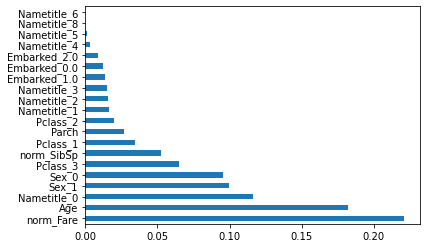

In [77]:
best_rf = best_clf_rf.best_estimator_.fit(X_train,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
"""xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}

#clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
#best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
#clf_performance(best_clf_xgb,'XGB')
clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb_rnd,'XGB')"""

In [78]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGB
Best Score: 0.849279502317019
Best Parameters: {'colsample_bytree': 0.85, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 5, 'sampling_method': 'uniform', 'subsample': 0.65}


# Best estimator is currently XGB: making submission

In [80]:
y_hat_xgb = best_clf_xgb.best_estimator_.predict(X_test).astype(int)
xgb_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_xgb}
submission_xgb = pd.DataFrame(data=xgb_submission)

file_name = 'XGB_gridtuned.csv'
submission_xgb.to_csv(data_path + file_name, index=False)

# Ensemble voting with best classifiers

In [81]:
# all estimators
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

In [82]:
voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'soft') 
voting_clf_all = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('lr', best_lr)], voting = 'soft') 
voting_clf_xgb = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('xgb', best_xgb),('lr', best_lr)], voting = 'soft')

print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5).mean())

print('voting_clf_all :',cross_val_score(voting_clf_all,X_train,y_train,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,X_train,y_train,cv=5).mean())

print('voting_clf_xgb :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5))
print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5).mean())

voting_clf_hard : [0.84269663 0.80898876 0.85393258 0.79775281 0.87570621]
voting_clf_hard mean : 0.8358154002412238
voting_clf_soft : [0.84269663 0.81460674 0.8258427  0.80337079 0.87570621]
voting_clf_soft mean : 0.8324446137243701
voting_clf_all : [0.84269663 0.81460674 0.83146067 0.79213483 0.8700565 ]
voting_clf_all mean : 0.8301910747159271
voting_clf_xgb : [0.84831461 0.83146067 0.84269663 0.80337079 0.86440678]
voting_clf_xgb mean : 0.8380498952580462


In [83]:
#Make Predictions 
voting_clf_hard.fit(X_train, y_train)
voting_clf_soft.fit(X_train, y_train)
voting_clf_all.fit(X_train, y_train)
voting_clf_xgb.fit(X_train, y_train)
best_rf.fit(X_train, y_train)

y_hat_vc_hard = voting_clf_hard.predict(X_test).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(X_test).astype(int)
y_hat_vc_all = voting_clf_all.predict(X_test).astype(int)
y_hat_vc_xgb = voting_clf_xgb.predict(X_test).astype(int)
y_hat_rf = best_rf.predict(X_test).astype(int)

In [84]:
#convert output to dataframe and make submission
final_data = {'PassengerId': test.PassengerId, 'Survived': y_hat_rf}
submission = pd.DataFrame(data=final_data)
submission.to_csv(data_path + 'submission_rf.csv', index =False)

final_data_2 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)
submission_2.to_csv(data_path + 'submission_vc_hard.csv',index=False)

final_data_3 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)
submission_3.to_csv(data_path + 'submission_vc_soft.csv', index=False)

final_data_4 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_all}
submission_4 = pd.DataFrame(data=final_data_4)
submission_4.to_csv(data_path + 'submission_vc_all.csv', index=False)

final_data_5 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_xgb}
submission_5 = pd.DataFrame(data=final_data_5)
submission_5.to_csv(data_path + 'submission_vc_xgb2.csv', index=False)